In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
import numpy as np
from scipy import stats
from datetime import date
from IPython.display import display, HTML, Markdown, Javascript
pd.options.mode.chained_assignment = None  # default='warn'

In [91]:
wastewater = pd.read_csv('~/bin/Viral Gene Copies Persons.csv', encoding="utf-16", sep='\t', thousands=',', parse_dates=['Date'], infer_datetime_format=True)  

In [92]:
with pd.option_context('display.max_rows', 5, 'display.max_columns', None):
    display(wastewater)

,Index,Wastewater Treatment Plant,County,Date,Population Served,Viral Gene Copies Per Person,Viral Gene Copies/L
0,1,Albemarle (CDC Contract),Stanly,2023-07-31,20000,164211596,370771
1,2,Albemarle (CDC Contract),Stanly,2023-07-26,20000,82636850,164138
...,...,...,...,...,...,...,...
7973,7974,Winston Salem - Salem,Forsyth,2021-06-23,178000,66976,0
7974,7975,Winston Salem - Salem,Forsyth,2021-06-19,178000,240667,0


In [93]:
wastewater_counties = wastewater.query('County == "Durham" | County == "Orange" | County == "Wake"')

with pd.option_context('display.max_rows', 5, 'display.max_columns', None):
    display(wastewater_counties)
    #display(wastewater['County'].unique())

,Index,Wastewater Treatment Plant,County,Date,Population Served,Viral Gene Copies Per Person,Viral Gene Copies/L
109,110,Cary 1,Wake,2023-08-23,84189,48341346,159990
110,111,Cary 1,Wake,2023-08-18,84189,58280834,188127
...,...,...,...,...,...,...,...
6557,6558,South Durham,Durham,2021-01-09,108105,10454320,34357
6558,6559,South Durham,Durham,2021-01-06,108105,6952582,21489


In [94]:
wastewater_counties['year'] = wastewater_counties['Date'].dt.isocalendar().year
wastewater_counties['week'] = wastewater_counties['Date'].dt.isocalendar().week
wastewater_counties_filtered = wastewater_counties[wastewater_counties['Viral Gene Copies Per Person'].transform(lambda x : (x<x.quantile(0.95))&(x>(x.quantile(0.05)))).eq(1)]
wastewater_counties_filtered['copies'] = wastewater_counties_filtered['Population Served'] * wastewater_counties_filtered['Viral Gene Copies Per Person']

In [95]:
with pd.option_context('display.max_rows', 30, 'display.max_columns', None):
    display(wastewater_counties_filtered)

,Index,Wastewater Treatment Plant,County,Date,Population Served,Viral Gene Copies Per Person,Viral Gene Copies/L,year,week,copies
109,110,Cary 1,Wake,2023-08-23,84189,48341346,159990,2023,34,4069809578394
110,111,Cary 1,Wake,2023-08-18,84189,58280834,188127,2023,33,4906605133626
111,112,Cary 1,Wake,2023-08-16,84189,39756470,128518,2023,33,3347057452830
112,113,Cary 1,Wake,2023-08-11,84189,24764432,80877,2023,32,2084892765648
113,114,Cary 1,Wake,2023-08-09,84189,26520210,81580,2023,32,2232709959690
...,...,...,...,...,...,...,...,...,...,...
6554,6555,South Durham,Durham,2021-01-20,108105,7293924,28931,2021,3,788509654020
6555,6556,South Durham,Durham,2021-01-16,108105,9457961,35587,2021,2,1022452873905
6556,6557,South Durham,Durham,2021-01-13,108105,8714805,30241,2021,2,942113994525
6557,6558,South Durham,Durham,2021-01-09,108105,10454320,34357,2021,1,1130164263600


In [96]:
wastewater_triangle_new = wastewater_counties_filtered.groupby(['year', 'week']).agg({'copies' : 'sum', 'Population Served': 'sum'})
wastewater_noindex = wastewater_triangle_new.reset_index()
wastewater_noindex['copies-per-person'] = wastewater_noindex['copies']/wastewater_noindex['Population Served']
wastewater_averaged = wastewater_noindex.filter(items=['year','week','copies-per-person'])

with pd.option_context('display.max_rows', 30, 'display.max_columns', None):
    #display(wastewater_triangle_new)
    #display(wastewater_noindex)
    display(wastewater_averaged)

,year,week,copies-per-person
0,2021,1,1.643464e+07
1,2021,2,1.622902e+07
2,2021,3,8.850987e+06
3,2021,4,7.032612e+06
4,2021,5,5.040285e+06
...,...,...,...
130,2023,30,2.662291e+07
131,2023,31,2.778129e+07
132,2023,32,2.647468e+07
133,2023,33,3.031644e+07


In [97]:
wastewater_pivot = wastewater_averaged.pivot(index='week', columns='year')

with pd.option_context('display.max_rows', 30, 'display.max_columns', None):
    display(wastewater_pivot)

copies-per-person                            
year              2021          2022          2023
week                                              
1         1.643464e+07  4.629300e+07  4.166703e+07
2         1.622902e+07  4.220645e+07  1.847159e+07
3         8.850987e+06  3.504617e+07  2.219215e+07
4         7.032612e+06  3.069303e+07  2.518114e+07
5         5.040285e+06  1.644386e+07  2.645424e+07
...                ...           ...           ...
48        3.846011e+06  1.596868e+07           NaN
49        7.272192e+06  1.893630e+07           NaN
50        1.213310e+07  2.686363e+07           NaN
51        1.798642e+07  2.706053e+07           NaN
52        3.727558e+07  4.812976e+07           NaN

[52 rows x 3 columns]

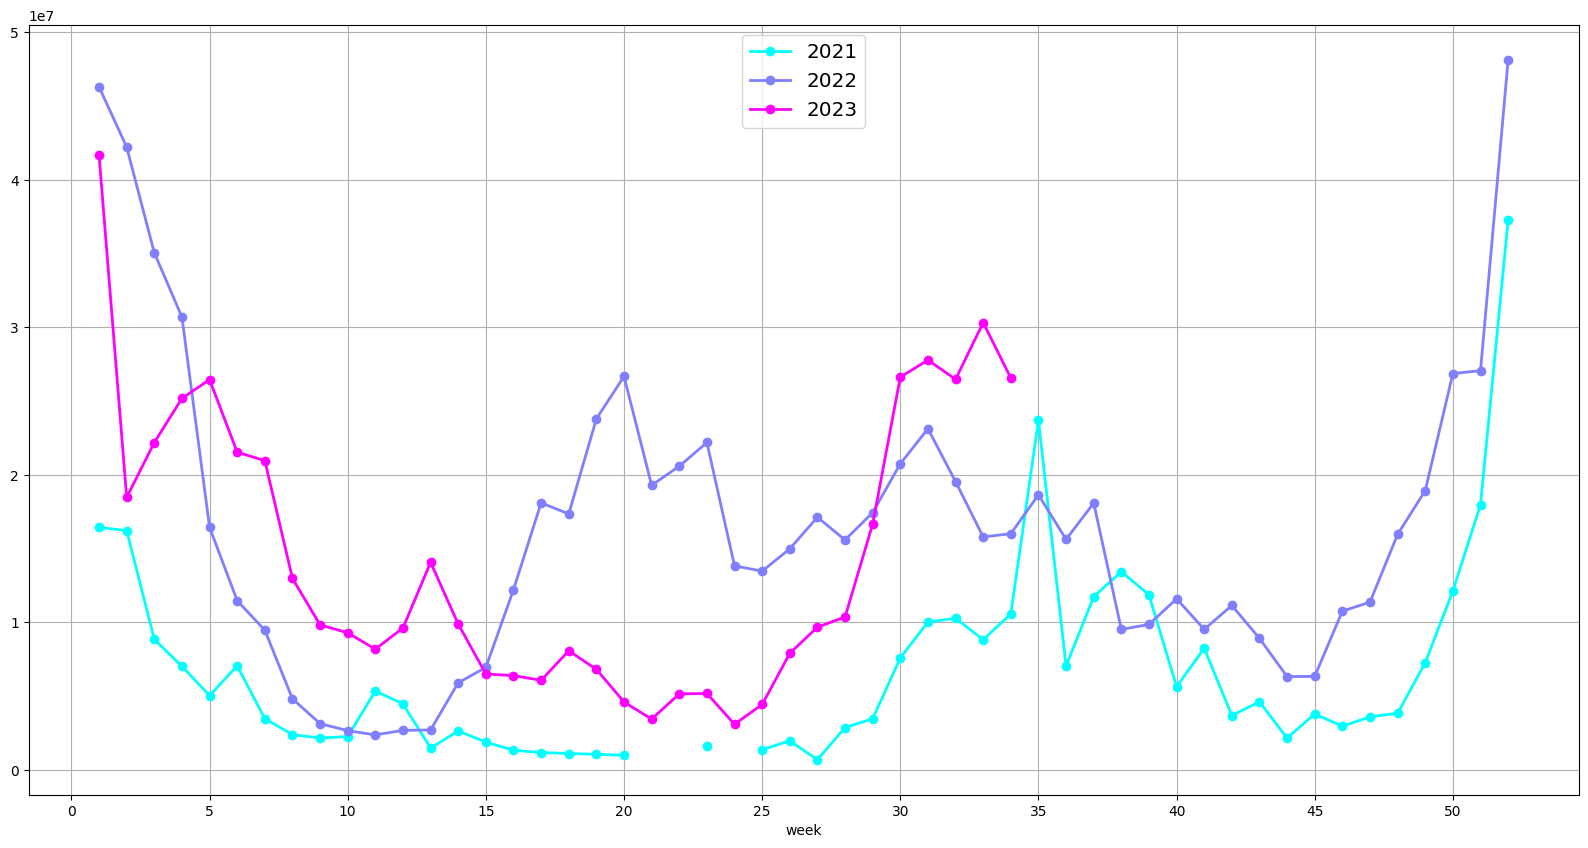

In [98]:
ax = wastewater_pivot.plot(figsize=(20,10), rot=0, grid=True, colormap='cool', lw=2, xticks = [0,5,10,15,20,25,30,35,40,45,50], style='o-')
ax.legend(['2021','2022','2023'], loc=9, fontsize='x-large')

In [99]:
wastewater_2023 = wastewater_counties_filtered[(wastewater_counties_filtered['Date'] >= '2023-01-01')]
wastewater_grouped = wastewater_2023.groupby([pd.Grouper(key='Date', freq='7D'), 'Wastewater Treatment Plant']).agg({'copies' : 'mean', 'County' : 'first', 'Population Served': 'mean'})
wastewater_county = wastewater_grouped.groupby(['Date', 'County']).agg({'copies' : 'sum', 'Population Served': 'sum'})
wastewater_county['Viral Gene Copies Per Person'] = wastewater_county['copies']/wastewater_county['Population Served']
wastewater_tograph = wastewater_county.filter(items=['Date', 'County', 'Viral Gene Copies Per Person'])

with pd.option_context('display.max_rows', 60, 'display.max_columns', None):
    #display(wastewater_2023)
    #display(wastewater_grouped)
    #display(wastewater_filtered.round(0))
    #display(wastewater_county)
    display(wastewater_tograph)


Viral Gene Copies Per Person
Date       County                              
2023-01-04 Durham                  4.894130e+07
           Orange                  2.717112e+07
           Wake                    3.863493e+07
2023-01-11 Durham                  4.045661e+07
           Orange                  2.068568e+07
...                                         ...
2023-08-16 Durham                  2.518150e+07
           Orange                  3.122144e+07
           Wake                    3.308828e+07
2023-08-23 Durham                  1.146860e+07
           Wake                    2.919319e+07

[101 rows x 1 columns]

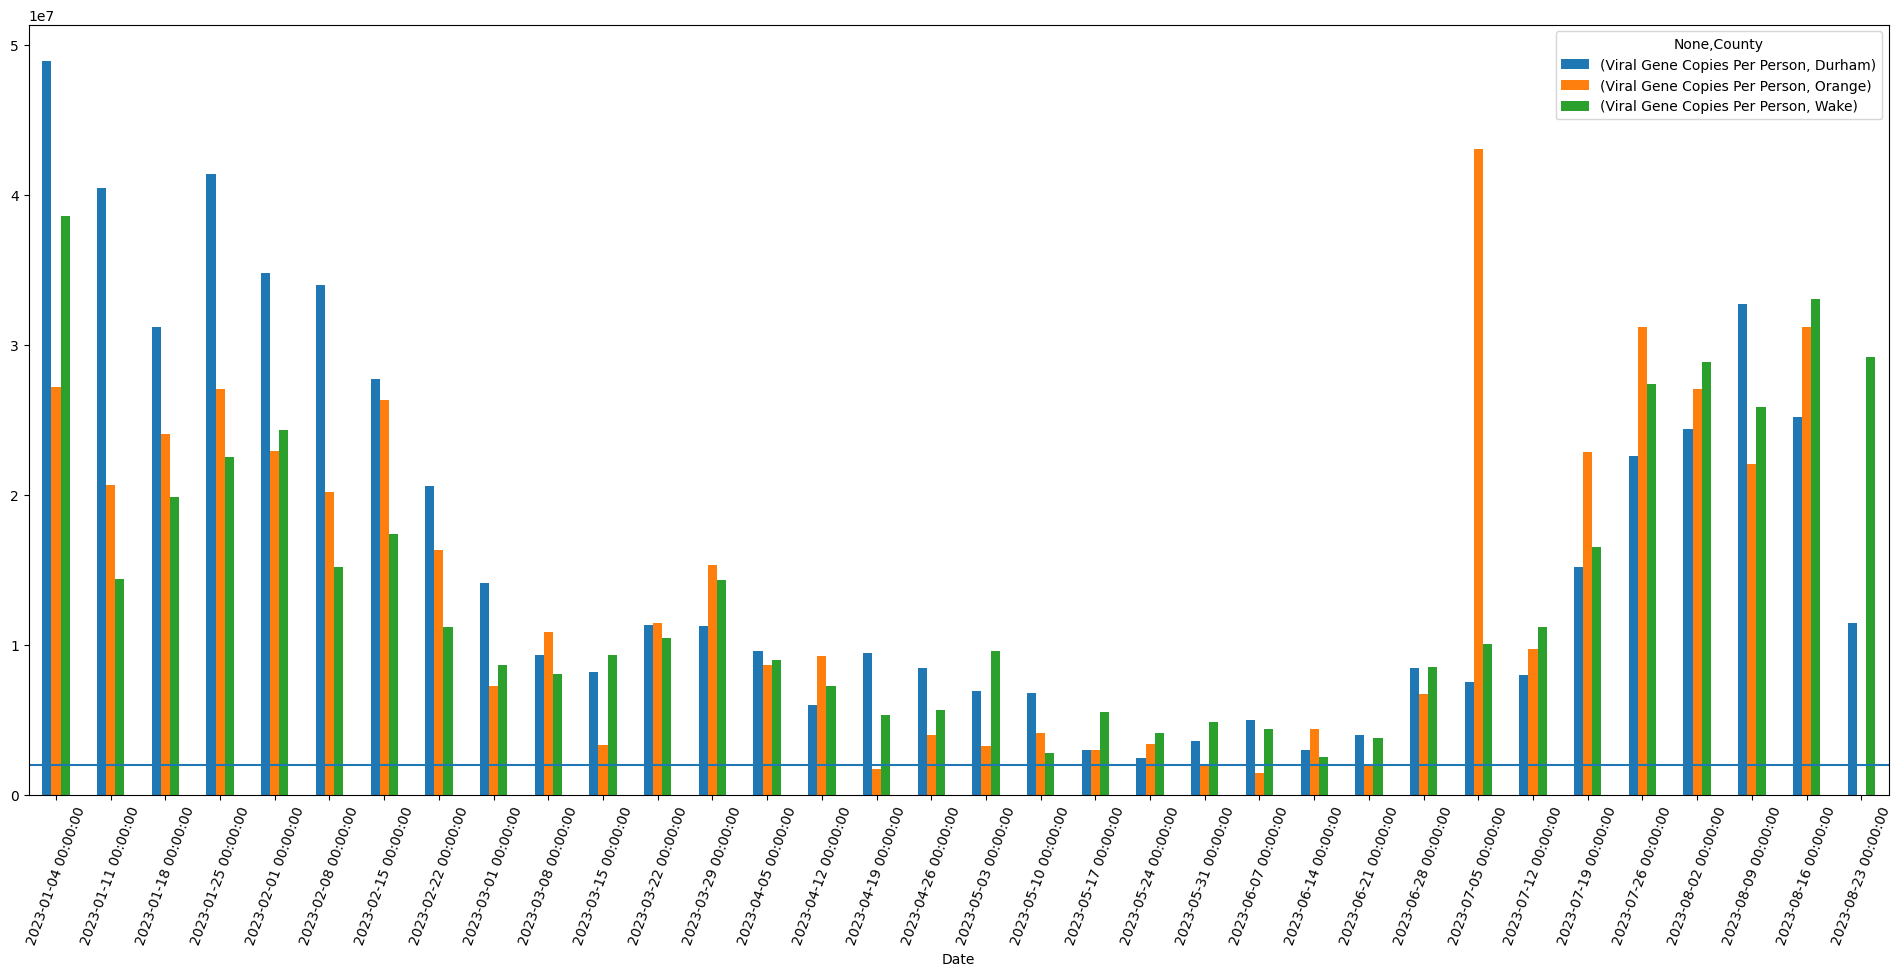

In [100]:
ax = wastewater_tograph.unstack().plot.bar(figsize=(24,10), rot=70).axhline(y=2000000);